In [1]:
import argparse
import random

import numpy as np
import torch

from src import config
from src.NICE_SLAM import NICE_SLAM
from src.Segmenter import Segmenter

import os #J:added
from torch.utils.tensorboard import SummaryWriter #J: added
import yaml #J: added

def setup_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True




cfg = config.load_config( #J:changed it to use our config file including semantics
    '/home/koerner/Project/nice-slam/configs/Own/room0.yaml','configs/nice_slam_sem.yaml')

#----------------------------added for tensorboard writer---------------------------
num_of_runs = len(os.listdir(cfg["data"]['logs'])) if os.path.exists(cfg["data"]['logs']) else 0
path = os.path.join(cfg["data"]['logs'], f'run_{num_of_runs + 1}')
cfg["data"]['logs'] = path
os.makedirs(path, exist_ok=True)

writer = SummaryWriter(path)
hparams_path = cfg['inherit_from']
with open(hparams_path, 'r') as file:
    hparams_dict = yaml.safe_load(file)
yaml_string = yaml.dump(hparams_dict, default_flow_style=False)
writer.add_text('hparams', yaml_string)
writer.close()
print('read in hparams')
#-----------------------------------------------------------------------------------

segmenter = Segmenter(cfg, None, store_directory=os.path.join(cfg['data']['input_folder'], 'segmentation'))


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
read in hparams


segment first frame


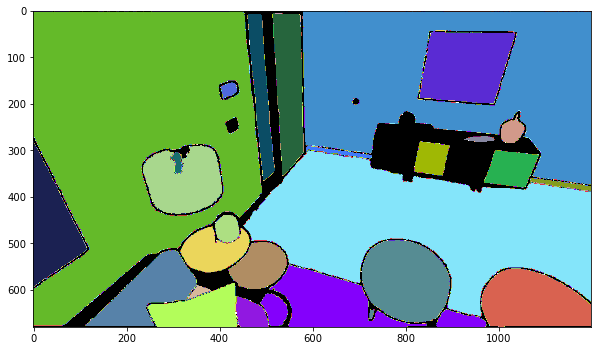

Storing segmentations: 100%|██████████| 2/2 [00:00<00:00, 415.73it/s]


In [2]:
frames = segmenter.run()


In [3]:
import glob
from PIL import Image
import os
from src.utils import vis
import numpy as np
import matplotlib.pyplot as plt
from scripts.gifMaker import make_gif_from_array

In [5]:
make_gif_from_array(frames, store = 'test2.gif')

In [7]:

frames_gif = []
visualizerForId = vis.visualizerForIds()


In [9]:
colors = visualizerForId.get_colors(frames[0].numpy().astype(np.uint8))*255

array([[[215.74398374,  31.60036753, 152.10415908, 255.        ],
        [215.74398374,  31.60036753, 152.10415908, 255.        ],
        [215.74398374,  31.60036753, 152.10415908, 255.        ],
        ...,
        [215.74398374,  31.60036753, 152.10415908, 255.        ],
        [215.74398374,  31.60036753, 152.10415908, 255.        ],
        [215.74398374,  31.60036753, 152.10415908, 255.        ]],

       [[215.74398374,  31.60036753, 152.10415908, 255.        ],
        [215.74398374,  31.60036753, 152.10415908, 255.        ],
        [215.74398374,  31.60036753, 152.10415908, 255.        ],
        ...,
        [215.74398374,  31.60036753, 152.10415908, 255.        ],
        [215.74398374,  31.60036753, 152.10415908, 255.        ],
        [215.74398374,  31.60036753, 152.10415908, 255.        ]],

       [[232.0172732 ,  32.80095536,  20.85392221, 255.        ],
        [232.0172732 ,  32.80095536,  20.85392221, 255.        ],
        [232.0172732 ,  32.80095536,  20.85392

In [12]:

for frame in frames:
    # Create image from array using plt.plot
    colors = (visualizerForId.get_colors(frame.numpy())*255).astype(np.uint8)
    im = Image.fromarray(colors)
    frames_gif.append(im)
    
    # Convert plot to image
    


In [ ]:
frame_one = frames[0]
frame_one.save(store, format="GIF", append_images=frames,
            save_all=True, duration=100, loop=0)
        